In [1]:
import keras
keras.__version__

'2.12.0'

In [2]:
#분류 데이터 불러오기(손글씨 데이터)
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape #28*28 픽셀이 6만개 있음.

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

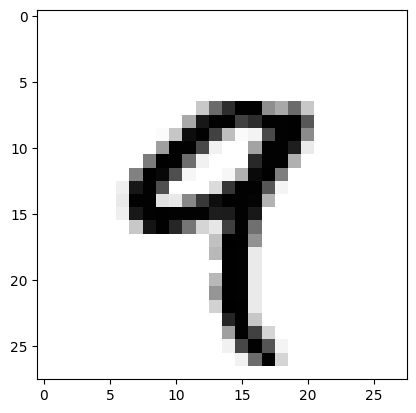

In [6]:
# 데이터의 확인
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)

In [7]:
# 신경망 만들기

from keras import models
from keras import layers

network = models.Sequential() #순차적으로 layer 쌓기.
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [8]:
#데이터 준비하기.

train_images = train_images.reshape((60000, 28*28)) #3차원 데이터를 2차원으로 바꾸기.
train_images = train_images.astype('float32') / 255 #데이터가 0부터 255까지의 숫자 ->255로 나누면 0~1로 표현이 가능.

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [9]:
#label data를 구별자로 표현하기.
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

In [10]:
# 신경망 학습
network.fit(train_images, train_labels, epochs = 5, batch_size = 128) #학습을 5번, 사이즈는 128

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2639 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0708 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0383 - accuracy: 0.9884


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test accuracy : ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9768
test accuracy :  0.9768000245094299


In [12]:
# Internet Movie DataBase

from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000) 
#dataset 중에서 출현단어가 높은 단어 10000개 들고오기. (number of words)

17464789/17464789 [==============================] - 0s 0us/step


In [13]:
train_data.shape

(25000,)

In [14]:
train_labels[0:5] #긍정 1 /부정 0으로 라벨링되어 있다.

array([1, 0, 0, 1, 0])

In [15]:
max([max(sequence) for sequence in train_data]) #for문으로 도는 것들에 대해 맥스 리스트를 뽑고, 거기서 다시 맥스를 뽑는다.
#one-hot encoding으로 되어있다.

9999

In [30]:
# data 준비

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  result = np.zeros((len(sequences), dimension))
  
  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [33]:
x_train[0] #결과가 float 타입.

array([0., 1., 1., ..., 0., 0., 0.])

In [34]:
# label 데이터도 실수형으로 바꾸기.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
y_train[0]

1.0

In [59]:
from keras.backend import sigmoid
# 신경망 만들기
from keras import models
from keras import layers

model = models.Sequential() #순차적인 모델
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,))) #input layer
model.add(layers.Dense(16, activation = 'relu')) #hidden layer
model.add(layers.Dense(1, activation = 'sigmoid')) #output layer, 2진 분류 문제의 마지막 레이어는 1, sigmoid(yes or no)
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy']) #2진 분류의 로스는 binary.

In [60]:
x_val = x_train[:10000] #검증용 data
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [61]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs =4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 62ms/step - loss: 0.5693 - accuracy: 0.7574 - val_loss: 0.4504 - val_accuracy: 0.8569
Epoch 2/4
30/30 [==============================] - 1s 40ms/step - loss: 0.3741 - accuracy: 0.8859 - val_loss: 0.3619 - val_accuracy: 0.8701
Epoch 3/4
30/30 [==============================] - 2s 63ms/step - loss: 0.2779 - accuracy: 0.9131 - val_loss: 0.3250 - val_accuracy: 0.8737
Epoch 4/4
30/30 [==============================] - 1s 46ms/step - loss: 0.2265 - accuracy: 0.9249 - val_loss: 0.2820 - val_accuracy: 0.8866


In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

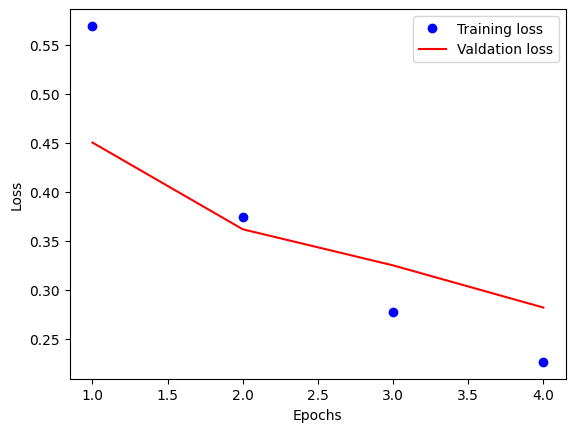

In [63]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Valdation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

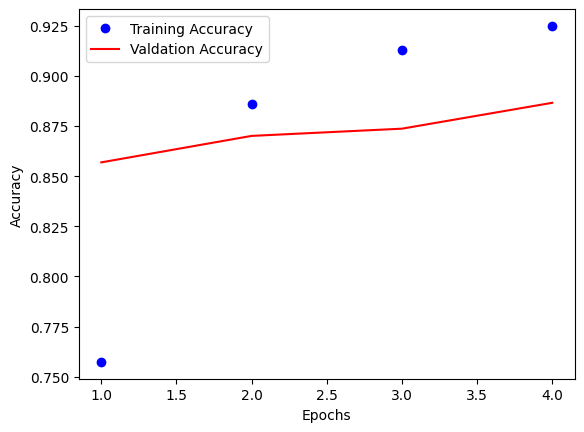

In [64]:
#accuracy 기준

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Valdation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [65]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.31577876],
       [0.98324215],
       [0.8846885 ],
       ...,
       [0.10778164],
       [0.1596561 ],
       [0.57644105]], dtype=float32)

In [67]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss = {0}, accuracy = {1}'.format(test_loss, test_acc))

782/782 [==============================] - 2s 2ms/step - loss: 0.2948 - accuracy: 0.8843
loss = 0.2948315739631653, accuracy = 0.8842800259590149
